<a href="https://colab.research.google.com/github/mahalakshmi2929/git-tutorial/blob/master/DL(03_01_2025)_Perceptron_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Implementation of a Single Perceptron for binary classification**

Dataset Used - Breast Cancer Wisconsin dataset which available in sklearn.datasets.

Key features about the dataset-

* Features: 30 numeric features describing the properties of the cell nuclei.

* Classes: Binary labels (0 for malignant, 1 for benign).

* Samples: 569 instances

Code Steps:

*   Load Dataset: Use load_breast_cancer from sklearn.datasets.

*   Preprocessing: Split the data into training and test sets, and standardize the features.

*   Training: Train the perceptron on the training data.

*   Evaluation: Calculate the accuracy on the test set.

In [ ]:
#import libraries

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Defining the Perceptron Class


class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def _step_function(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._step_function(linear_output)

                # Perceptron rule
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self._step_function(x) for x in linear_output])


In [ ]:
#Load the Dataset and divide into Training and Testing datasets

data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.01, n_iterations=1000)
perceptron.fit(X_train, y_train)

In [ ]:
# Make predictions and evaluate
predictions = perceptron.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.98%


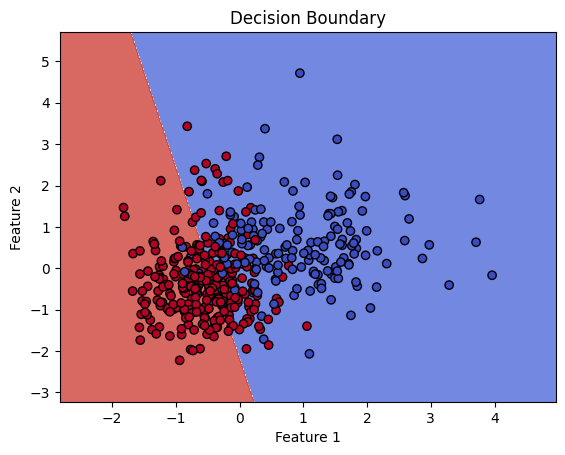

In [ ]:
# Ensure the dataset has only two features
X_train_2d = X_train[:, :2]  # Select the first two features
X_test_2d = X_test[:, :2]

# Train the perceptron on the 2D feature set
perceptron_2d = Perceptron(learning_rate=0.01, n_iterations=1000)
perceptron_2d.fit(X_train_2d, y_train)

# Visualization Function
def plot_decision_boundary(X, y, model):
    # Generate a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on the grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Call the function for visualization
plot_decision_boundary(X_train_2d, y_train, perceptron_2d)



**2. Implementation of a Single Layer Perceptron for multi class classification**

Dataset Used - Digits dataset contains features for recognizing hand-written digits (0-9).

Code Steps:

Load Dataset: Use load_breast_cancer from sklearn.datasets.

Preprocessing: Split the data into training and test sets, and standardize the features.

Training: Train the perceptron on the training data.

Evaluation: Calculate the accuracy on the test set.

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def _step_function(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._step_function(linear_output)

                # Perceptron rule
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self._step_function(x) for x in linear_output])

class MultiClassPerceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.models = []

    def fit(self, X, y):
        # Binarize the output labels for OvR strategy
        self.classes = np.unique(y)
        lb = LabelBinarizer()
        y_binarized = lb.fit_transform(y)
        if len(self.classes) == 2:
            y_binarized = np.hstack([1 - y_binarized, y_binarized])

        for i, cls in enumerate(self.classes):
            print(f"Training perceptron for class {cls}")
            model = Perceptron(learning_rate=self.learning_rate, n_iterations=self.n_iterations)
            model.fit(X, y_binarized[:, i])
            self.models.append(model)

    def predict(self, X):
        # Get predictions from each binary perceptron
        scores = np.array([model.predict(X) for model in self.models]).T
        return np.argmax(scores, axis=1)

# Load a dataset (Digits dataset for multi-class classification)
digits = load_digits()
X, y = digits.data, digits.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate the multi-class perceptron
multi_perceptron = MultiClassPerceptron(learning_rate=0.01, n_iterations=1000)
multi_perceptron.fit(X_train, y_train)

# Predictions and evaluation
y_pred = multi_perceptron.predict(X_test)

# Accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Training perceptron for class 0
Training perceptron for class 1
Training perceptron for class 2
Training perceptron for class 3
Training perceptron for class 4
Training perceptron for class 5
Training perceptron for class 6
Training perceptron for class 7
Training perceptron for class 8
Training perceptron for class 9
Accuracy: 90.00%


Training perceptron for class 0
Training perceptron for class 1
Training perceptron for class 2
Training perceptron for class 3
Training perceptron for class 4
Training perceptron for class 5
Training perceptron for class 6
Training perceptron for class 7
Training perceptron for class 8
Training perceptron for class 9


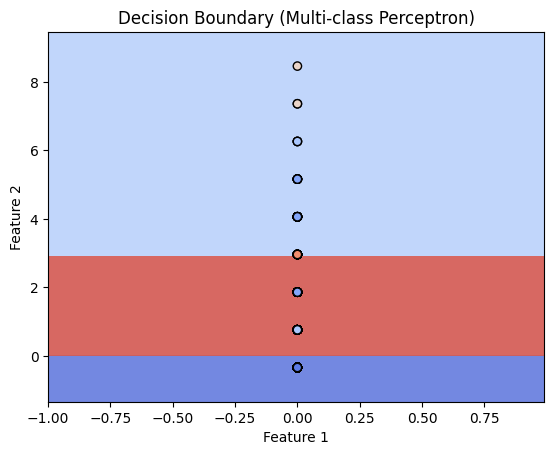

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary_multi(X, y, model):
    # Generate a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on the grid points using the multi-class model
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary (Multi-class Perceptron)')
    plt.show()

# Train the multi-class perceptron on a 2D dataset
X_train_2d = X_train[:, :2]  # Reduce to two features
X_test_2d = X_test[:, :2]

multi_perceptron = MultiClassPerceptron(learning_rate=0.01, n_iterations=1000)
multi_perceptron.fit(X_train_2d, y_train)

# Plot the decision boundary
plot_decision_boundary_multi(X_train_2d, y_train, multi_perceptron)
